# Classifying Aerial Imagery Into Arbitrary Classes With Keras

This experiment uses the UC Merced land use imagery dataset, which contains X classes of aerial photos taken from the USGS Urban Area Imagery Survey. I grouped 1,900 labeled images into three new classes:

- paved
- unpaved
- built 

I will attempt to train five neural network that are capable of generalizing features common to the examples in each of the classes. I expect that the unpaved images should be the easiest to classify, and the other two to be difficult. While I can perceive commonalities between, say, an airport runway and a parking lot, or a hospital and a house, from the air, impermeable/buit surfaces can appear very similar in color, texture, and the way they reflect light. This is a tricky classification, and human evaluators may disagree on which bucket to put a given image in. For that reason, the built/paved classification will probably be the challenge that the winning network will have to meet.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import split_folders
%config InlineBackend.figure_formats = set(['retina'])
%matplotlib inline
import seaborn as sns
import pyplot_themes as themes
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# plot settings
themes.theme_solarized_light2(fontsize=10)
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['font.sans-serif'] = ['news gothic std']
sns.set_palette(themes.palettes.FiveThirtyEight.colors)
pd.options.display.float_format = '{:.7f}'.format

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras import Model
  
img_width, img_height = 256, 256

In [4]:
train_image_generator = ImageDataGenerator(rescale=1. / 255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1. / 255) # Generator for our validation data

In [5]:
test_image_generator = ImageDataGenerator(rescale=1. / 255) # Generator for our validation data

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=4,
                                                           directory='images/train',
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='categorical')

Found 1520 images belonging to 3 classes.


In [7]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=4,
                                                           directory='images/val',
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='categorical')

Found 190 images belonging to 3 classes.


## Network #1

### Architecture

This model will follow an architecture from a sample binary classifier for cats and dogs, with three neurons in the final output layer instead of two. There are three convolutional layers with max pooling.

### Hyperparameters

For a baseline we will not adjust any of the default parameters except for batch/step size to allow my CPU to train this model.

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [352]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [353]:
model.optimizer.epsilon = 0.1

In [354]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 65536)           

In [355]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 147s 387ms/step - loss: 1.0941 - accuracy: 0.3664 - val_loss: 1.0952 - val_accuracy: 0.3564
Epoch 2/15
380/380 [==============================] - 140s 369ms/step - loss: 1.0732 - accuracy: 0.4454 - val_loss: 1.0815 - val_accuracy: 0.3404
Epoch 3/15
380/380 [==============================] - 141s 371ms/step - loss: 1.0262 - accuracy: 0.5151 - val_loss: 0.9806 - val_accuracy: 0.5957
Epoch 4/15
380/380 [==============================] - 141s 371ms/step - loss: 0.9717 - accuracy: 0.5770 - val_loss: 0.9300 - val_accuracy: 0.6330
Epoch 5/15
380/380 [==============================] - 140s 370ms/step - loss: 0.9215 - accuracy: 0.6289 - val_loss: 0.8726 - val_accuracy: 0.6809
Epoch 6/15
380/380 [==============================] - 141s 371ms/step - loss: 0.8618 - accuracy: 0.6993 - val_loss: 0.8800 - val_accuracy: 0.6383
Epoch 7/15
380/380 [==============================] - 141s 370ms/step - loss: 0.8

In [356]:
historyb = model.fit(
    train_data_gen,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 141s 371ms/step - loss: 0.6070 - accuracy: 0.9526 - val_loss: 0.7914 - val_accuracy: 0.7553
Epoch 2/15
380/380 [==============================] - 726s 2s/step - loss: 0.5962 - accuracy: 0.9612 - val_loss: 0.7892 - val_accuracy: 0.7660
Epoch 3/15
380/380 [==============================] - 143s 375ms/step - loss: 0.5887 - accuracy: 0.9658 - val_loss: 0.7908 - val_accuracy: 0.7447
Epoch 4/15
380/380 [==============================] - 142s 373ms/step - loss: 0.5855 - accuracy: 0.9678 - val_loss: 0.7885 - val_accuracy: 0.7500
Epoch 5/15
380/380 [==============================] - 142s 375ms/step - loss: 0.5819 - accuracy: 0.9717 - val_loss: 0.8612 - val_accuracy: 0.6702
Epoch 6/15
380/380 [==============================] - 140s 368ms/step - loss: 0.5846 - accuracy: 0.9704 - val_loss: 0.7896 - val_accuracy: 0.7500
Epoch 7/15
380/380 [==============================] - 142s 373ms/step - loss: 0.5778

In [357]:
model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


In [ ]:
test = test_image_generator.flow_from_directory(batch_size=1,
                                                    directory='images/dumb',
                                                    target_size=(img_height, img_width),
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )

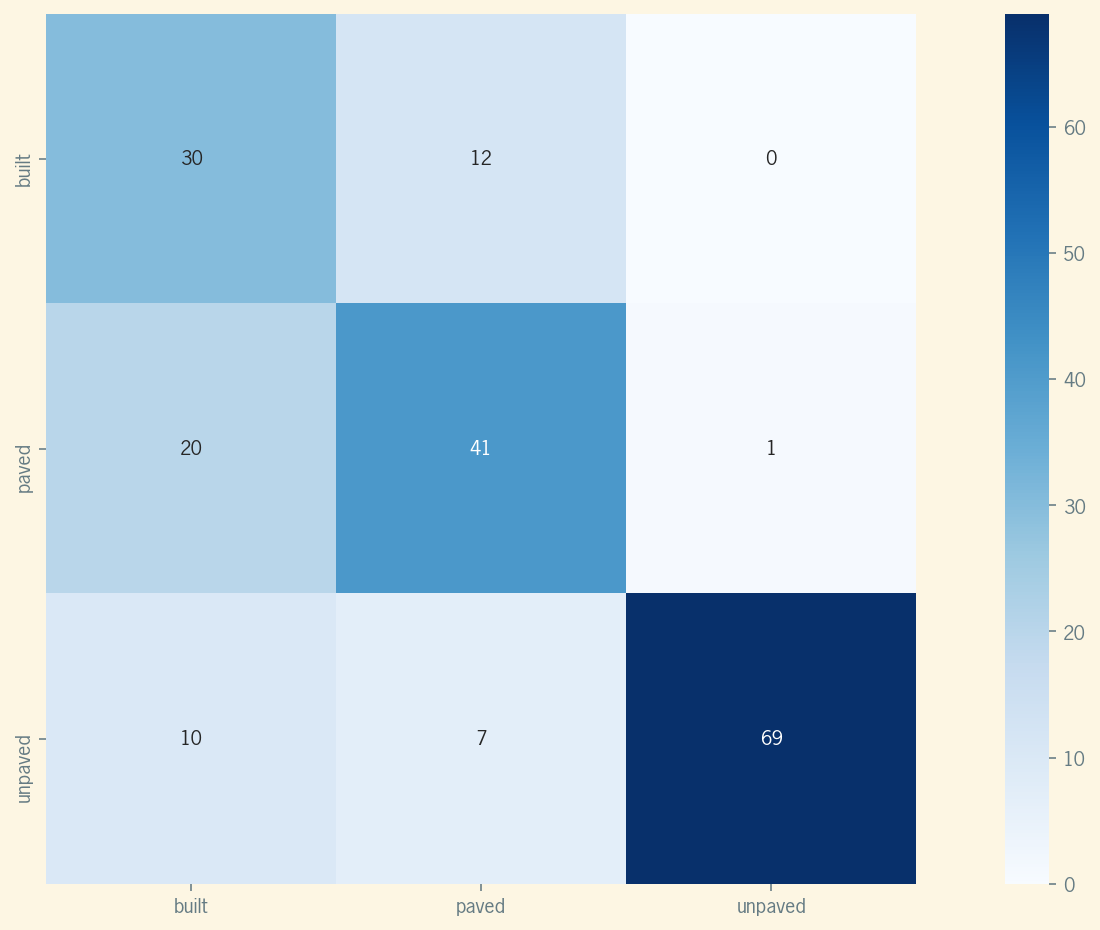

In [399]:
pred = model.predict_generator(test2a, len(test.filenames))
pred = np.argmax(pred,axis=1)
sns.heatmap(metrics.confusion_matrix(pred,test2a.classes), annot=True,  cmap='Blues', square=True, 
            xticklabels=test.class_indices.keys(), yticklabels=test2a.class_indices.keys())

This model began overfitting during the third epoch, when validation loss started increasing as the training loss decreased until the model performed perfectly on the training data but made larger and larger errors in the validation examples.

## Network #2

The first network learned on the raw training images. To reduce the overfitting that occurred on the first run of this model I will add an augmentation step to the training ImageDataGenerator object that will rotate, shift, and zoom examples as they are fed to the network.

In [8]:
image_gen_train2 = ImageDataGenerator(
                    rescale=1. / 255,
                    rotation_range=30,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.15
                    )

In [9]:
train_data_gen2 = image_gen_train2.flow_from_directory(batch_size=4,
                                                     directory='images/train',
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode='categorical')

Found 1520 images belonging to 3 classes.


In [10]:
validation_data_gen2 = validation_image_generator.flow_from_directory(batch_size=4,
                                                           directory='images/val',
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='categorical')

Found 190 images belonging to 3 classes.


In [11]:
test_data_gen2 = test_image_generator.flow_from_directory(batch_size=4,
                                                           directory='images/test',
                                                           target_size=(img_height, img_width),
                                                           class_mode='categorical')

Found 190 images belonging to 3 classes.


In [13]:
model2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [340]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [341]:
model2.optimizer.epsilon = .1

In [342]:
history = model2.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 164s 431ms/step - loss: 1.0976 - accuracy: 0.3414 - val_loss: 1.0885 - val_accuracy: 0.3989
Epoch 2/30
380/380 [==============================] - 163s 428ms/step - loss: 1.0820 - accuracy: 0.4283 - val_loss: 1.0521 - val_accuracy: 0.4947
Epoch 3/30
380/380 [==============================] - 163s 430ms/step - loss: 1.0518 - accuracy: 0.4724 - val_loss: 1.0215 - val_accuracy: 0.5000
Epoch 4/30
380/380 [==============================] - 165s 435ms/step - loss: 1.0076 - accuracy: 0.5191 - val_loss: 0.9664 - val_accuracy: 0.5532
Epoch 5/30
380/380 [==============================] - 161s 423ms/step - loss: 0.9882 - accuracy: 0.5283 - val_loss: 0.9318 - val_accuracy: 0.6011
Epoch 6/30
380/380 [==============================] - 161s 424ms/step - loss: 0.9504 - accuracy: 0.5625 - val_loss: 0.8993 - val_accuracy: 0.6809
Epoch 7/30
380/380 [==============================] - 161s 424ms/step - loss: 0.9

In [347]:
model2.save('model2')

INFO:tensorflow:Assets written to: model2/assets


In [344]:
history2b = model2.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 158s 415ms/step - loss: 0.7642 - accuracy: 0.7842 - val_loss: 0.7727 - val_accuracy: 0.7766
Epoch 2/30
380/380 [==============================] - 155s 408ms/step - loss: 0.7511 - accuracy: 0.8046 - val_loss: 0.7464 - val_accuracy: 0.7926
Epoch 3/30
380/380 [==============================] - 155s 409ms/step - loss: 0.7650 - accuracy: 0.7836 - val_loss: 0.7187 - val_accuracy: 0.8298
Epoch 4/30
380/380 [==============================] - 155s 407ms/step - loss: 0.7533 - accuracy: 0.7908 - val_loss: 0.7095 - val_accuracy: 0.8404
Epoch 5/30
380/380 [==============================] - 155s 408ms/step - loss: 0.7609 - accuracy: 0.7882 - val_loss: 0.7223 - val_accuracy: 0.8191
Epoch 6/30
380/380 [==============================] - 155s 407ms/step - loss: 0.7543 - accuracy: 0.7980 - val_loss: 0.7642 - val_accuracy: 0.7766
Epoch 7/30
380/380 [==============================] - 155s 408ms/step - loss: 0.7

In [345]:
history2c = model2.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 155s 407ms/step - loss: 0.7056 - accuracy: 0.8454 - val_loss: 0.6761 - val_accuracy: 0.8777
Epoch 2/30
380/380 [==============================] - 156s 411ms/step - loss: 0.7056 - accuracy: 0.8434 - val_loss: 0.6940 - val_accuracy: 0.8617
Epoch 3/30
380/380 [==============================] - 155s 408ms/step - loss: 0.7068 - accuracy: 0.8414 - val_loss: 0.7157 - val_accuracy: 0.8351
Epoch 4/30
380/380 [==============================] - 155s 409ms/step - loss: 0.7110 - accuracy: 0.8342 - val_loss: 0.6718 - val_accuracy: 0.8989
Epoch 5/30
380/380 [==============================] - 158s 416ms/step - loss: 0.6919 - accuracy: 0.8572 - val_loss: 0.7167 - val_accuracy: 0.8351
Epoch 6/30
380/380 [==============================] - 156s 410ms/step - loss: 0.6973 - accuracy: 0.8520 - val_loss: 0.7008 - val_accuracy: 0.8457
Epoch 7/30
380/380 [==============================] - 159s 417ms/step - loss: 0.6

In [346]:
history2d = model2.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 155s 408ms/step - loss: 0.6710 - accuracy: 0.8796 - val_loss: 0.6543 - val_accuracy: 0.8936
Epoch 2/30
380/380 [==============================] - 153s 404ms/step - loss: 0.6707 - accuracy: 0.8789 - val_loss: 0.6615 - val_accuracy: 0.8936
Epoch 3/30
380/380 [==============================] - 155s 407ms/step - loss: 0.6656 - accuracy: 0.8816 - val_loss: 0.6688 - val_accuracy: 0.8830
Epoch 4/30
380/380 [==============================] - 154s 406ms/step - loss: 0.6720 - accuracy: 0.8789 - val_loss: 0.6710 - val_accuracy: 0.8777
Epoch 5/30
380/380 [==============================] - 156s 411ms/step - loss: 0.6587 - accuracy: 0.8934 - val_loss: 0.6698 - val_accuracy: 0.8830
Epoch 6/30
380/380 [==============================] - 154s 406ms/step - loss: 0.6777 - accuracy: 0.8691 - val_loss: 0.6762 - val_accuracy: 0.8723
Epoch 7/30
380/380 [==============================] - 157s 413ms/step - loss: 0.6

 It looks like image augmentation had a positive effect on the model fitting process. Performance on the test data should be improved.

In [26]:
test_image_generator_2 = ImageDataGenerator(rescale=1. / 255)

In [27]:
test2a = test_image_generator_2.flow_from_directory(batch_size=1,
                                                    directory='images/dumb',
                                                    target_size=(img_height, img_width),
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )

Found 190 images belonging to 3 classes.


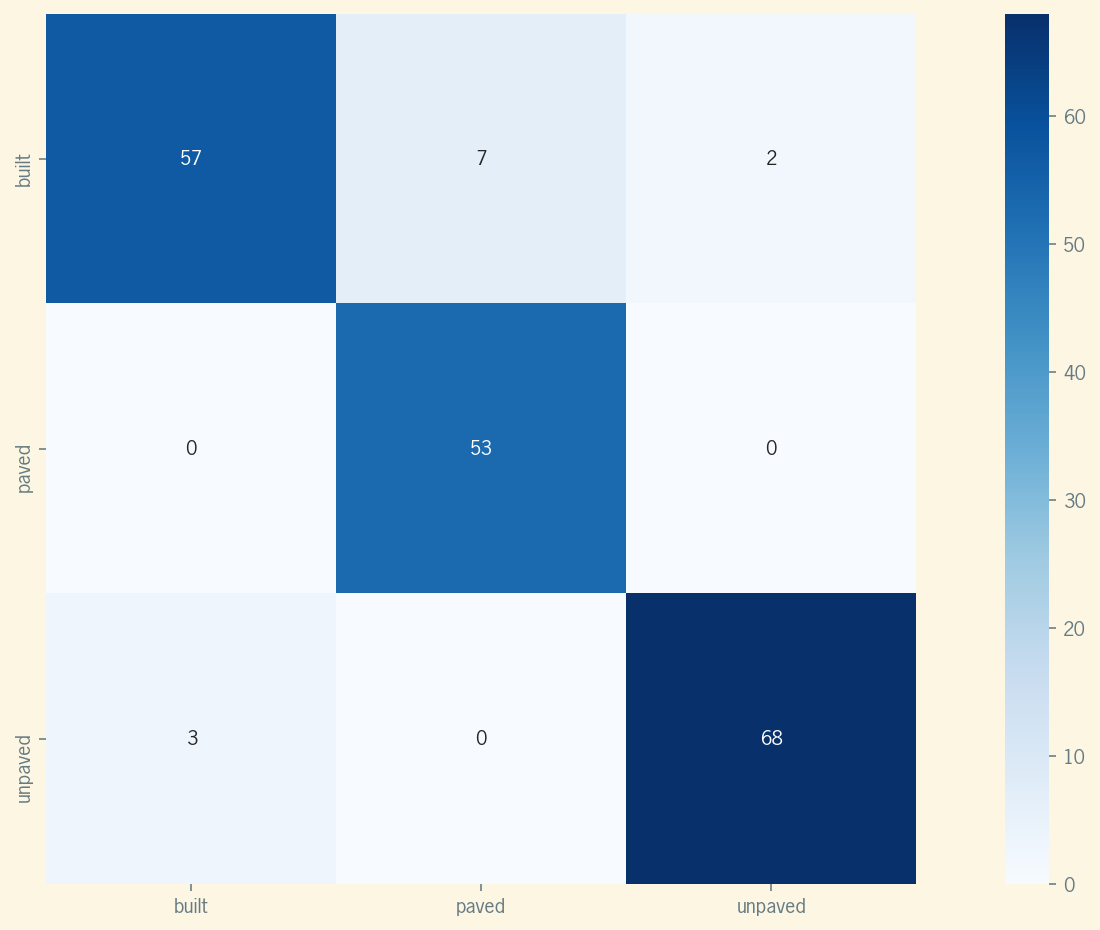

In [398]:
pred = model2.predict_generator(test2a, len(test2a.filenames))
pred = np.argmax(pred,axis=1)
sns.heatmap(metrics.confusion_matrix(pred,test2a.classes), annot=True, square=True,
             cmap='Blues',xticklabels=test2a.class_indices.keys(), yticklabels=test2a.class_indices.keys())

In [243]:
for layer in model2.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_3 (3, 3, 3, 16)
conv2d_4 (3, 3, 16, 32)
conv2d_5 (3, 3, 32, 64)


In [246]:
filters, biases = model2.layers[0].get_weights()

In [247]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

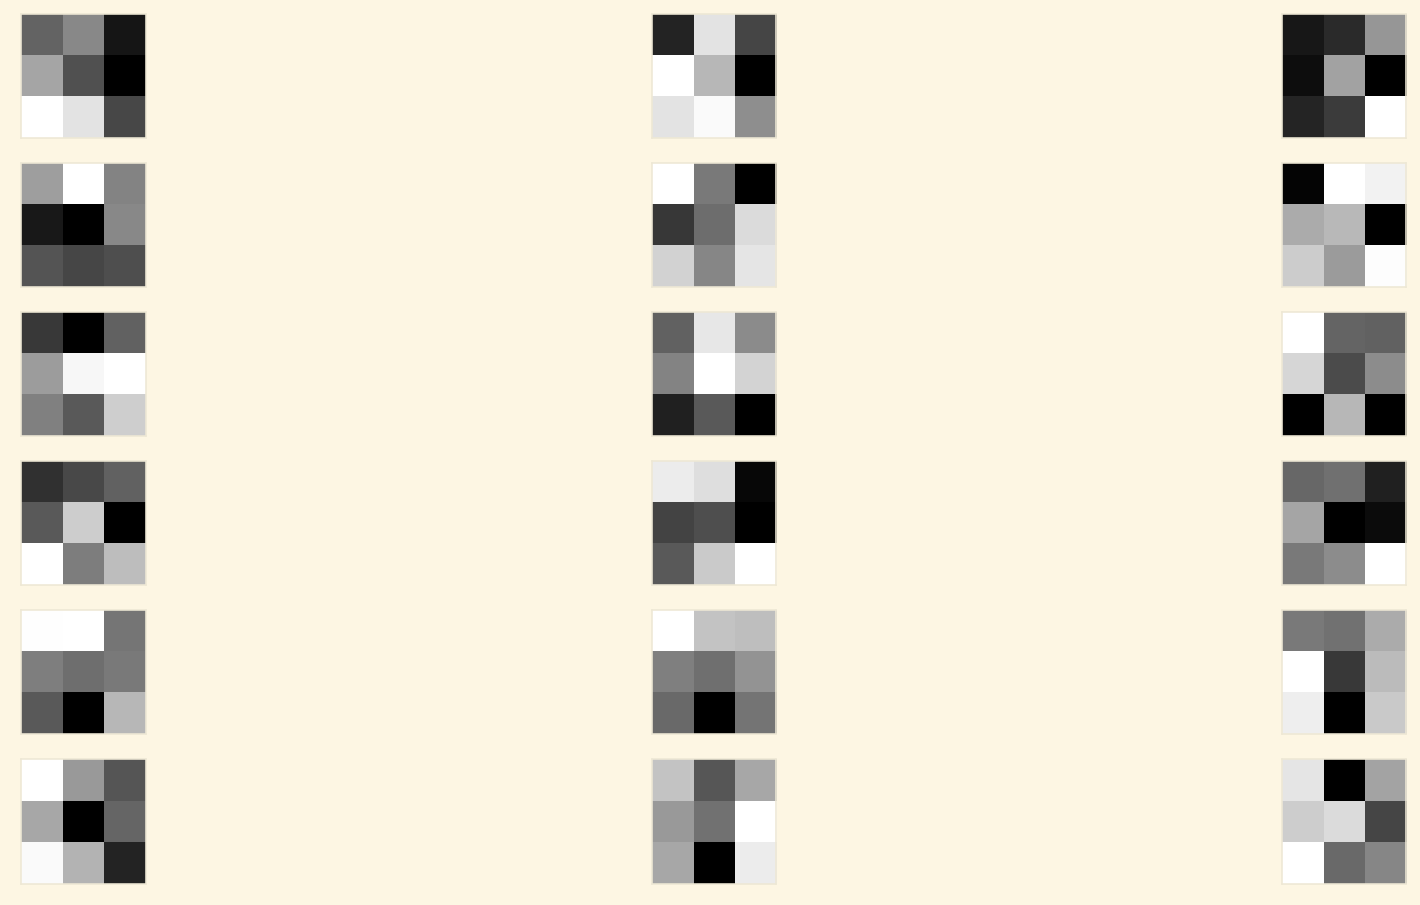

In [250]:
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [251]:
for i in range(len(model2.layers)):
	layer = model2.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_3 (None, 256, 256, 16)
2 conv2d_4 (None, 128, 128, 32)
4 conv2d_5 (None, 64, 64, 64)


In [268]:
model2_l1 = Model(inputs=model2.inputs, outputs=model2.layers[4].output)

In [282]:
img = image.load_img('images/untitled.png')

In [283]:
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = K.expand_dims(img, axis=0)

In [284]:
img = img/ 255.0

In [285]:
feature_maps = model2_l1.predict(img)

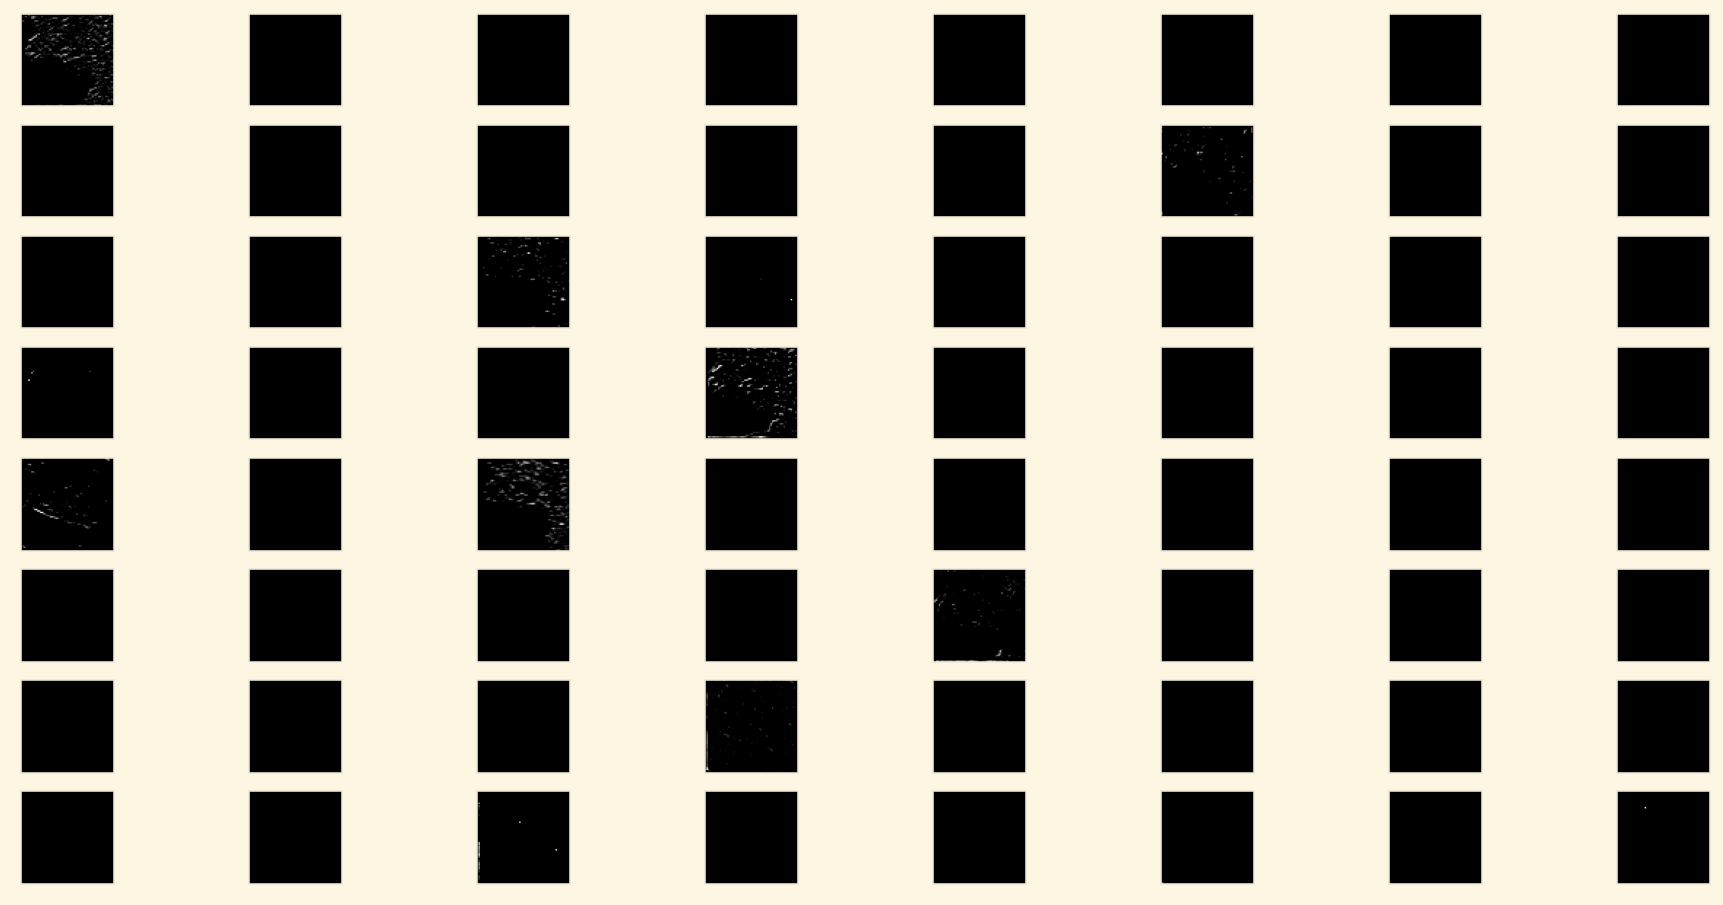

In [286]:
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

The only significant misclassification happening here are for images labeled as "paved" which in fact contain identifiable buildings around the edges. A number of these have been classified as "built," which is actually a reasonable category to put them in. Depending on the practical application of the artificial categories I created for this experiment, I might want to retrain the model but relabel those types of examples (if I now decided I wanted such images classified as "built"). Alternatively, that level of fuzziness might be inherent in the classses themselves. In that case, maybe the 1 in 6 error is acceptable. Besides this seemingly understandable confusion, the classes are being predicted extremely well.

## Network #3

This model based on the version of the Xception network in the Keras documentation

In [11]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = inputs

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    # x = layers.Dropout(.4)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

In [ ]:
model3 = make_model(input_shape=(256,256) + (3,), num_classes=3)

In [15]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 128, 128, 32) 128         conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 128, 128, 32) 0           batch_normalization_11[0][0]     
____________________________________________________________________________________________

In [13]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [390]:
model3.optimizer.epsilon = 1.0

In [391]:
history = model3.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 390s 1s/step - loss: 1.0586 - accuracy: 0.4303 - val_loss: 1.1013 - val_accuracy: 0.3670
Epoch 2/30
380/380 [==============================] - 297s 780ms/step - loss: 0.9715 - accuracy: 0.5480 - val_loss: 0.9440 - val_accuracy: 0.5851
Epoch 3/30
380/380 [==============================] - 296s 779ms/step - loss: 0.9360 - accuracy: 0.6138 - val_loss: 0.8876 - val_accuracy: 0.6755
Epoch 4/30
380/380 [==============================] - 293s 771ms/step - loss: 0.9052 - accuracy: 0.6553 - val_loss: 0.8534 - val_accuracy: 0.7181
Epoch 5/30
380/380 [==============================] - 291s 766ms/step - loss: 0.8825 - accuracy: 0.6842 - val_loss: 0.8377 - val_accuracy: 0.7128
Epoch 6/30
380/380 [==============================] - 286s 753ms/step - loss: 0.8658 - accuracy: 0.6901 - val_loss: 0.8090 - val_accuracy: 0.7287
Epoch 7/30
380/380 [==============================] - 292s 768ms/step - loss: 0.8490

In [392]:
model3.save('model3')

INFO:tensorflow:Assets written to: model3/assets


In [393]:
history3b = model3.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 283s 744ms/step - loss: 0.7266 - accuracy: 0.8349 - val_loss: 0.8167 - val_accuracy: 0.7394
Epoch 2/15
380/380 [==============================] - 283s 746ms/step - loss: 0.7294 - accuracy: 0.8230 - val_loss: 0.7331 - val_accuracy: 0.8085
Epoch 3/15
380/380 [==============================] - 284s 747ms/step - loss: 0.7260 - accuracy: 0.8316 - val_loss: 0.8159 - val_accuracy: 0.7234
Epoch 4/15
380/380 [==============================] - 284s 747ms/step - loss: 0.7201 - accuracy: 0.8388 - val_loss: 0.7325 - val_accuracy: 0.8138
Epoch 5/15
380/380 [==============================] - 280s 738ms/step - loss: 0.7254 - accuracy: 0.8296 - val_loss: 0.7676 - val_accuracy: 0.7819
Epoch 6/15
380/380 [==============================] - 276s 727ms/step - loss: 0.7177 - accuracy: 0.8401 - val_loss: 0.7655 - val_accuracy: 0.7660
Epoch 7/15
380/380 [==============================] - 277s 729ms/step - loss: 0.7

In [394]:
history3c = model3.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 282s 743ms/step - loss: 0.6925 - accuracy: 0.8684 - val_loss: 0.7410 - val_accuracy: 0.8085
Epoch 2/15
380/380 [==============================] - 276s 726ms/step - loss: 0.6902 - accuracy: 0.8678 - val_loss: 0.7773 - val_accuracy: 0.7660
Epoch 3/15
380/380 [==============================] - 275s 724ms/step - loss: 0.6899 - accuracy: 0.8717 - val_loss: 0.6936 - val_accuracy: 0.8564
Epoch 4/15
380/380 [==============================] - 275s 724ms/step - loss: 0.6951 - accuracy: 0.8651 - val_loss: 0.7446 - val_accuracy: 0.8032
Epoch 5/15
380/380 [==============================] - 276s 726ms/step - loss: 0.6895 - accuracy: 0.8664 - val_loss: 0.7838 - val_accuracy: 0.7606
Epoch 6/15
380/380 [==============================] - 275s 724ms/step - loss: 0.6826 - accuracy: 0.8776 - val_loss: 0.7125 - val_accuracy: 0.8351
Epoch 7/15
380/380 [==============================] - 276s 725ms/step - loss: 0.6

In [312]:
history3c = model3.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=5,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/5
380/380 [==============================] - 539s 1s/step - loss: 0.6467 - accuracy: 0.9039 - val_loss: 0.6904 - val_accuracy: 0.8617
Epoch 2/5
380/380 [==============================] - 990s 3s/step - loss: 0.6379 - accuracy: 0.9158 - val_loss: 0.7925 - val_accuracy: 0.7553
Epoch 3/5
380/380 [==============================] - 295s 775ms/step - loss: 0.6520 - accuracy: 0.8974 - val_loss: 0.6639 - val_accuracy: 0.8936
Epoch 4/5
380/380 [==============================] - 293s 771ms/step - loss: 0.6377 - accuracy: 0.9145 - val_loss: 0.6360 - val_accuracy: 0.9149
Epoch 5/5
380/380 [==============================] - 296s 778ms/step - loss: 0.6487 - accuracy: 0.9046 - val_loss: 0.6592 - val_accuracy: 0.8936


In [314]:
history3e = model3.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=10,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/10
380/380 [==============================] - 306s 805ms/step - loss: 0.6362 - accuracy: 0.9164 - val_loss: 0.7958 - val_accuracy: 0.7394
Epoch 2/10
380/380 [==============================] - 308s 810ms/step - loss: 0.6472 - accuracy: 0.9033 - val_loss: 0.6829 - val_accuracy: 0.8564
Epoch 3/10
380/380 [==============================] - 300s 789ms/step - loss: 0.6441 - accuracy: 0.9092 - val_loss: 0.7484 - val_accuracy: 0.7979
Epoch 4/10
380/380 [==============================] - 301s 792ms/step - loss: 0.6365 - accuracy: 0.9132 - val_loss: 0.6561 - val_accuracy: 0.8883
Epoch 5/10
380/380 [==============================] - 296s 780ms/step - loss: 0.6522 - accuracy: 0.8954 - val_loss: 0.6897 - val_accuracy: 0.8617
Epoch 6/10
380/380 [==============================] - 304s 800ms/step - loss: 0.6397 - accuracy: 0.9118 - val_loss: 0.7049 - val_accuracy: 0.8457
Epoch 7/10
380/380 [==============================] - 297s 782ms/step - loss: 0.6

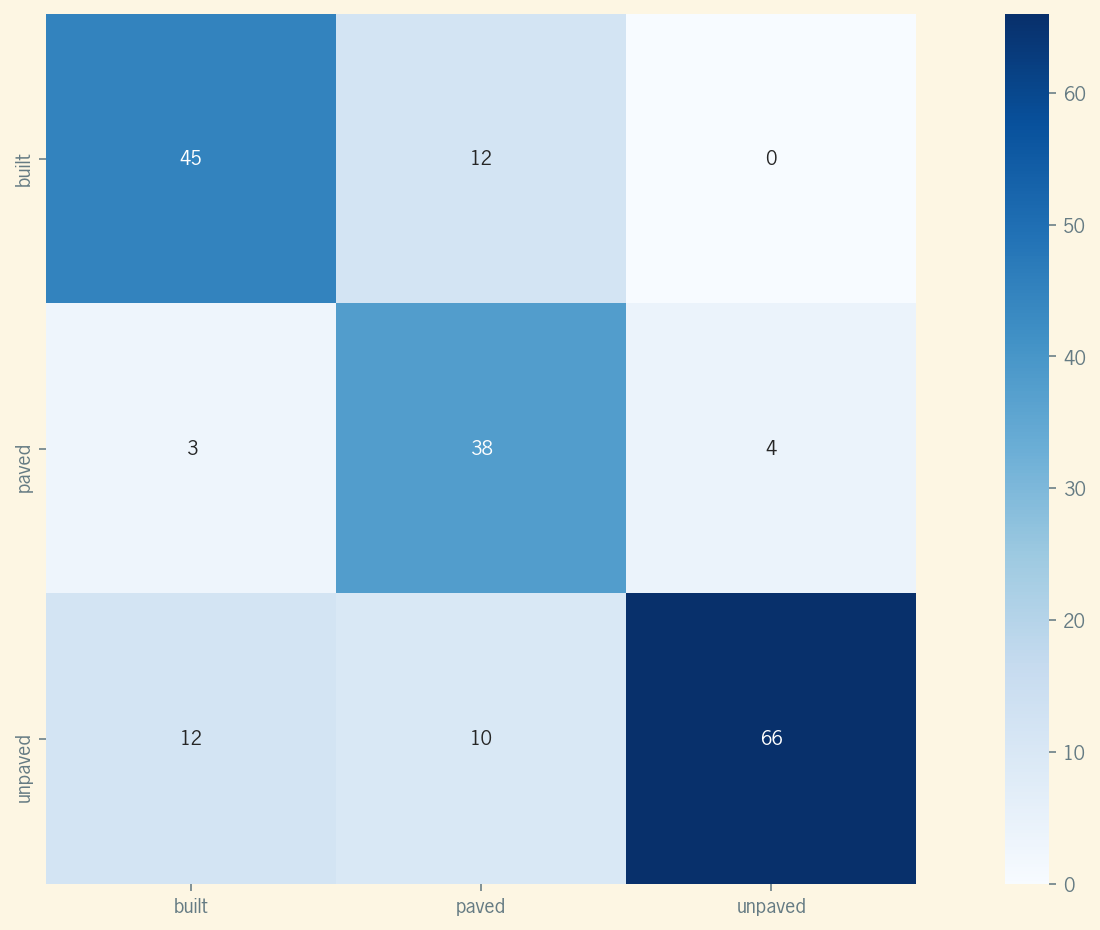

In [400]:
pred3 = model3.predict_generator(test, len(test.filenames))
pred3 = np.argmax(pred3,axis=1)
sns.heatmap(metrics.confusion_matrix(pred3,test.classes), annot=True, square=True,
             cmap='Blues',xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())

## Network #4

In [15]:
model4 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [16]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model4.optimizer.epsilon = .1
history = model4.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 115s 302ms/step - loss: 1.0971 - accuracy: 0.3579 - val_loss: 1.0922 - val_accuracy: 0.3777
Epoch 2/30
380/380 [==============================] - 115s 303ms/step - loss: 1.0874 - accuracy: 0.4204 - val_loss: 1.0674 - val_accuracy: 0.5851
Epoch 3/30
380/380 [==============================] - 115s 303ms/step - loss: 1.0495 - accuracy: 0.4914 - val_loss: 0.9877 - val_accuracy: 0.5745
Epoch 4/30
380/380 [==============================] - 116s 305ms/step - loss: 0.9874 - accuracy: 0.5309 - val_loss: 0.9629 - val_accuracy: 0.5426
Epoch 5/30
380/380 [==============================] - 149s 392ms/step - loss: 0.9555 - accuracy: 0.5743 - val_loss: 0.8983 - val_accuracy: 0.6330
Epoch 6/30
380/380 [==============================] - 141s 370ms/step - loss: 0.9248 - accuracy: 0.6026 - val_loss: 0.9033 - val_accuracy: 0.6223
Epoch 7/30
380/380 [==============================] - 137s 359ms/step - loss: 0.9

In [18]:
model4.save('model4')

INFO:tensorflow:Assets written to: model4/assets


In [19]:
history4b = model4.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 119s 312ms/step - loss: 0.7359 - accuracy: 0.8151 - val_loss: 0.7023 - val_accuracy: 0.8404
Epoch 2/15
380/380 [==============================] - 129s 339ms/step - loss: 0.7351 - accuracy: 0.8112 - val_loss: 0.7066 - val_accuracy: 0.8404
Epoch 3/15
380/380 [==============================] - 122s 320ms/step - loss: 0.7306 - accuracy: 0.8178 - val_loss: 0.6936 - val_accuracy: 0.8617
Epoch 4/15
380/380 [==============================] - 127s 334ms/step - loss: 0.7319 - accuracy: 0.8171 - val_loss: 0.6892 - val_accuracy: 0.8777
Epoch 5/15
380/380 [==============================] - 124s 327ms/step - loss: 0.7170 - accuracy: 0.8322 - val_loss: 0.6810 - val_accuracy: 0.8723
Epoch 6/15
380/380 [==============================] - 125s 329ms/step - loss: 0.7249 - accuracy: 0.8276 - val_loss: 0.7954 - val_accuracy: 0.7447
Epoch 7/15
380/380 [==============================] - 128s 336ms/step - loss: 0.7

In [ ]:
model4.save('model4')

In [22]:
history4c = model4.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 120s 316ms/step - loss: 0.6962 - accuracy: 0.8553 - val_loss: 0.6727 - val_accuracy: 0.8617
Epoch 2/15
380/380 [==============================] - 124s 325ms/step - loss: 0.6915 - accuracy: 0.8559 - val_loss: 0.7035 - val_accuracy: 0.8351
Epoch 3/15
380/380 [==============================] - 124s 326ms/step - loss: 0.6863 - accuracy: 0.8632 - val_loss: 0.6400 - val_accuracy: 0.9202
Epoch 4/15
380/380 [==============================] - 125s 329ms/step - loss: 0.6857 - accuracy: 0.8651 - val_loss: 0.6842 - val_accuracy: 0.8670
Epoch 5/15
380/380 [==============================] - 126s 332ms/step - loss: 0.6891 - accuracy: 0.8605 - val_loss: 0.6977 - val_accuracy: 0.8511
Epoch 6/15
380/380 [==============================] - 127s 334ms/step - loss: 0.6852 - accuracy: 0.8645 - val_loss: 0.7354 - val_accuracy: 0.8138
Epoch 7/15
380/380 [==============================] - 127s 334ms/step - loss: 0.6

In [23]:
model4.save('model4')

INFO:tensorflow:Assets written to: model4/assets


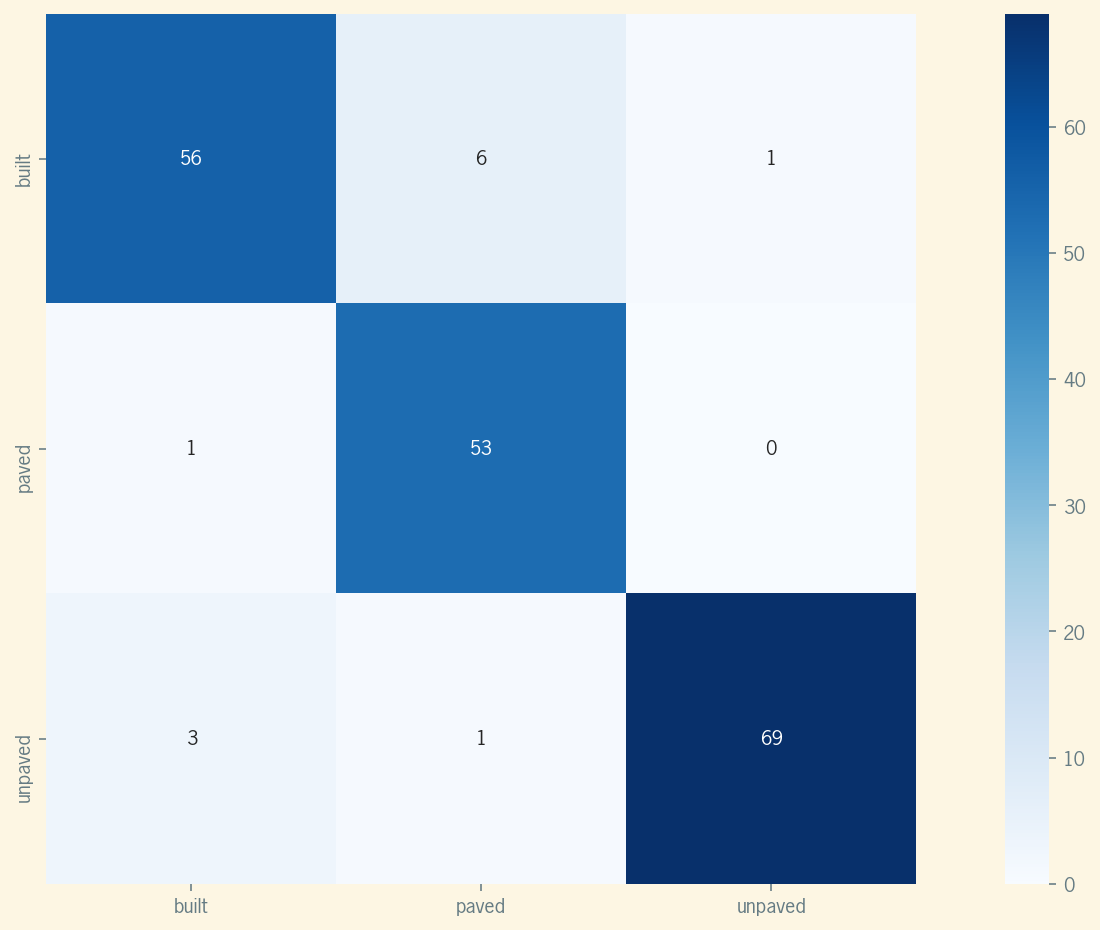

In [28]:
pred4 = model4.predict_generator(test2a, len(test.filenames))
pred4 = np.argmax(pred4,axis=1)
sns.heatmap(metrics.confusion_matrix(pred4,test2a.classes), annot=True, square=True,
             cmap='Blues',xticklabels=test2a.class_indices.keys(), yticklabels=test2a.class_indices.keys())

## Network #5

In [12]:
model5 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [13]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model5.optimizer.epsilon = .1
model5.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 277s 728ms/step - loss: 1.0987 - accuracy: 0.3526 - val_loss: 1.0779 - val_accuracy: 0.4255
Epoch 2/30
380/380 [==============================] - 285s 750ms/step - loss: 1.0771 - accuracy: 0.4289 - val_loss: 1.0385 - val_accuracy: 0.4787
Epoch 3/30
380/380 [==============================] - 289s 760ms/step - loss: 1.0445 - accuracy: 0.4783 - val_loss: 0.9793 - val_accuracy: 0.5745
Epoch 4/30
380/380 [==============================] - 282s 742ms/step - loss: 1.0159 - accuracy: 0.5007 - val_loss: 1.0073 - val_accuracy: 0.4947
Epoch 5/30
380/380 [==============================] - 281s 741ms/step - loss: 0.9780 - accuracy: 0.5263 - val_loss: 0.9286 - val_accuracy: 0.6383
Epoch 6/30
380/380 [==============================] - 283s 744ms/step - loss: 0.9566 - accuracy: 0.5645 - val_loss: 0.9164 - val_accuracy: 0.5851
Epoch 7/30
380/380 [==============================] - 295s 775ms/step - loss: 0.9

In [14]:
model5.save('model5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model5/assets


In [20]:
history5b = model5.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=30,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/30
380/380 [==============================] - 297s 781ms/step - loss: 0.7768 - accuracy: 0.7612 - val_loss: 0.8165 - val_accuracy: 0.7340
Epoch 2/30
380/380 [==============================] - 310s 815ms/step - loss: 0.7807 - accuracy: 0.7658 - val_loss: 0.7483 - val_accuracy: 0.8032
Epoch 3/30
380/380 [==============================] - 310s 816ms/step - loss: 0.7889 - accuracy: 0.7539 - val_loss: 0.7538 - val_accuracy: 0.8032
Epoch 4/30
380/380 [==============================] - 297s 783ms/step - loss: 0.7799 - accuracy: 0.7678 - val_loss: 0.7473 - val_accuracy: 0.8085
Epoch 5/30
380/380 [==============================] - 294s 773ms/step - loss: 0.7696 - accuracy: 0.7750 - val_loss: 0.7384 - val_accuracy: 0.8245
Epoch 6/30
380/380 [==============================] - 296s 778ms/step - loss: 0.7684 - accuracy: 0.7789 - val_loss: 0.7245 - val_accuracy: 0.8298
Epoch 7/30
380/380 [==============================] - 296s 779ms/step - loss: 0.7

In [21]:
model5.save('model5')

INFO:tensorflow:Assets written to: model5/assets


In [29]:
history5c = model5.fit(
    train_data_gen2,
    steps_per_epoch=380,
    epochs=15,
    validation_data=validation_data_gen2,
    validation_steps=47
)

Train for 380 steps, validate for 47 steps
Epoch 1/15
380/380 [==============================] - 304s 800ms/step - loss: 0.7007 - accuracy: 0.8513 - val_loss: 0.7512 - val_accuracy: 0.7872
Epoch 2/15
380/380 [==============================] - 303s 798ms/step - loss: 0.7089 - accuracy: 0.8382 - val_loss: 0.7029 - val_accuracy: 0.8511
Epoch 3/15
380/380 [==============================] - 297s 781ms/step - loss: 0.7129 - accuracy: 0.8316 - val_loss: 0.6804 - val_accuracy: 0.8723
Epoch 4/15
380/380 [==============================] - 295s 776ms/step - loss: 0.6907 - accuracy: 0.8612 - val_loss: 0.7005 - val_accuracy: 0.8511
Epoch 5/15
380/380 [==============================] - 292s 769ms/step - loss: 0.7049 - accuracy: 0.8421 - val_loss: 0.7021 - val_accuracy: 0.8511
Epoch 6/15
380/380 [==============================] - 293s 771ms/step - loss: 0.6958 - accuracy: 0.8539 - val_loss: 0.6770 - val_accuracy: 0.8617
Epoch 7/15
380/380 [==============================] - 289s 760ms/step - loss: 0.6

In [ ]:
from texter import send
send('Done with CNN training!')

In [30]:
model5.save('model5')

INFO:tensorflow:Assets written to: model5/assets


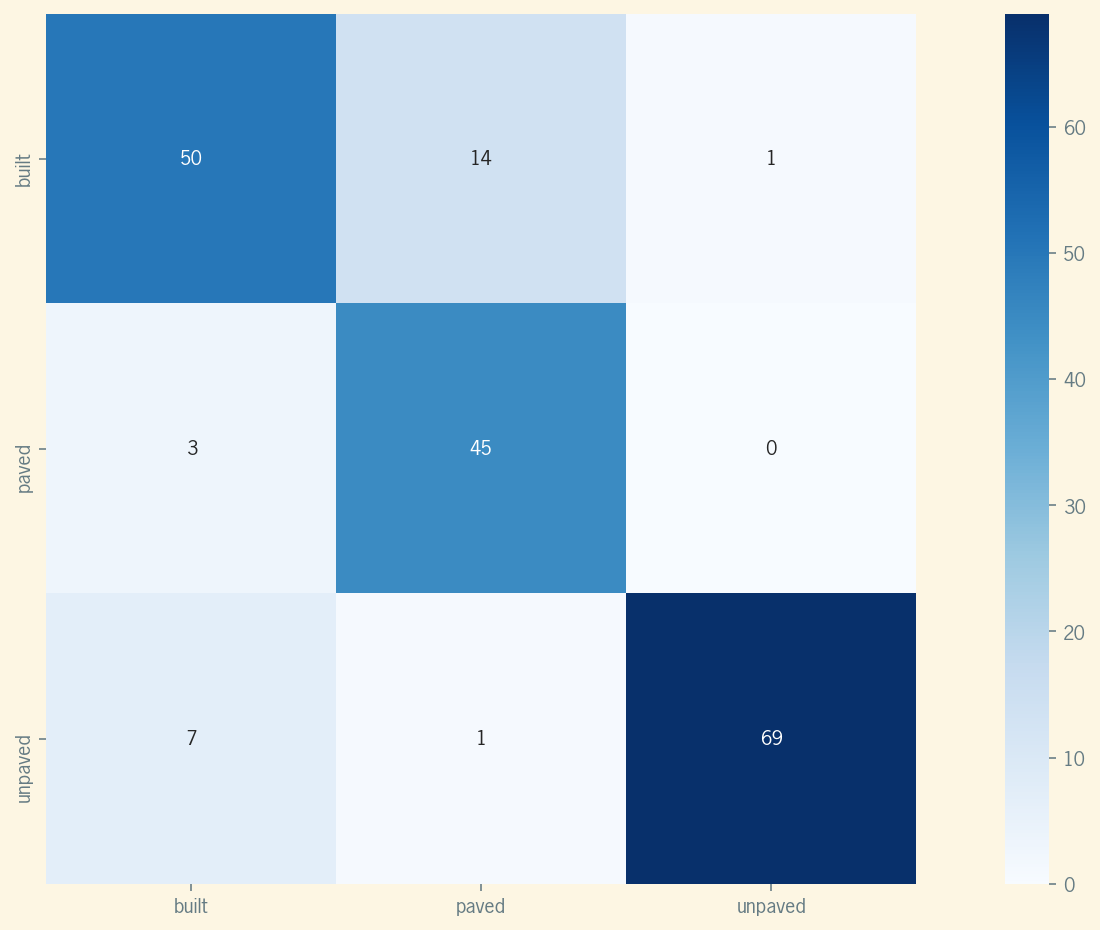

In [31]:
pred5 = model5.predict_generator(test2a, len(test.filenames))
pred5 = np.argmax(pred5,axis=1)
sns.heatmap(metrics.confusion_matrix(pred5,test2a.classes), annot=True, square=True,
             cmap='Blues',xticklabels=test2a.class_indices.keys(), yticklabels=test2a.class_indices.keys())

## Evaluation and Selection

We had five models: Two three layer CNNs based on a binary classifier, the latter trained with image augmentation, a version of the Xception network, and two other CNN variants, one with two layers and one with four. Because my goal was to find a suitable network that I could train locally, compute time was almost as important a consideration for me as accuracy. 

Model 1 overfit pretty quickly. Adding image augmentaion to subsequent networks greatly improved accuracy by preventing overfitting while the network learned. Models 2, 3, 4, and 5 all did fairly well at classifying the images, but 3 and 5 were slower to train and did not achieve as much accuracy as 2 and 4.

Ultimately, Model #4 provided the best balance of classification performance and training time. Its performance was almost identical to network 2 but it was faster train.

### Winner: Network #4